# Image Classifcation

#### Convolutional Neural Network

In [31]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Part 1 - Data Preprocessing

In [32]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/AML/CNN/Cat Dog/Test1',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/AML/CNN/Cat Dog/Test1',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1068 images belonging to 2 classes.
Found 1068 images belonging to 2 classes.


#### Part 2 - Building the CNN

In [33]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [34]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

#### Part 3 - Training the CNN

In [35]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
34/34 [==============================] - 8s 232ms/step - loss: 0.7013 - accuracy: 0.5384 - val_loss: 0.6883 - val_accuracy: 0.5543
Epoch 2/25
34/34 [==============================] - 8s 227ms/step - loss: 0.6857 - accuracy: 0.5787 - val_loss: 0.6775 - val_accuracy: 0.5356
Epoch 3/25
34/34 [==============================] - 8s 231ms/step - loss: 0.6602 - accuracy: 0.5993 - val_loss: 0.6310 - val_accuracy: 0.6273
Epoch 4/25
34/34 [==============================] - 8s 228ms/step - loss: 0.6326 - accuracy: 0.6330 - val_loss: 0.5881 - val_accuracy: 0.6845
Epoch 5/25
34/34 [==============================] - 8s 228ms/step - loss: 0.6270 - accuracy: 0.6732 - val_loss: 0.6510 - val_accuracy: 0.6479
Epoch 6/25
34/34 [==============================] - 8s 230ms/step - loss: 0.6302 - accuracy: 0.6470 - val_loss: 0.5887 - val_accuracy: 0.7060
Epoch 7/25
34/34 [==============================] - 8s 230ms/step - loss: 0.5995 - accuracy: 0.6845 - val_loss: 0.5561 - val_accuracy: 0.7257
Epoch 

In [10]:
# save it as a h5 file
from tensorflow.keras.models import load_model
cnn.save('model_rcat_dog.h5')

#### Part 4 - Making a single prediction

#### Example 1

The image classified is cat


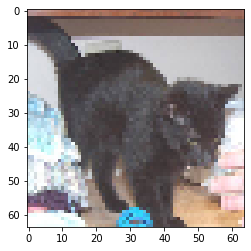

In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/AML/CNN/Cat Dog/Test1/cats/cat.4030.jpg', target_size = (64, 64))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)


if result[0]<=0.5:
    print("The image classified is cat")
else:
    print("The image classified is dog")

#### Example 2

The image classified is dog


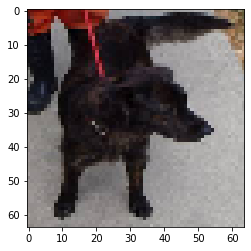

In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/AML/CNN/Cat Dog/Test1/dogs/dog.4007.jpg', target_size = (64, 64))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

result = cnn.predict(test_image)


if result[0]<=0.5:
    print("The image classified is cat")
else:
    print("The image classified is dog")